In [26]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

### Cifar 10 dataset download

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

### Making two dimensional array to one dimension

In [5]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes=["airplane",'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
classes[9]

'truck'

### Defining function to plot image

In [8]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]]);

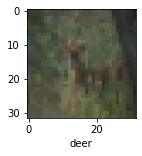

In [9]:
plot_sample(x_train,y_train,10)

### Normalizing pixcells

In [12]:
x_train=x_train/255
x_test=x_test/255

### Building simple artificial neural network

In [18]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.8084 - accuracy: 0.3567
Epoch 2/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.6231 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.5402 - accuracy: 0.4562
Epoch 4/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.4822 - accuracy: 0.4786
Epoch 5/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4289 - accuracy: 0.4975


In [19]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.4502 - accuracy: 0.4869


[1.4502110481262207, 0.4869000017642975]

### We can see our accuracy is 48.69% which is very low which shows ANN is not performing well.

### Classification report for ANN

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=model.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54      1000
           1       0.51      0.72      0.60      1000
           2       0.38      0.39      0.38      1000
           3       0.37      0.35      0.36      1000
           4       0.44      0.42      0.43      1000
           5       0.42      0.35      0.38      1000
           6       0.50      0.57      0.53      1000
           7       0.64      0.48      0.55      1000
           8       0.49      0.74      0.59      1000
           9       0.67      0.33      0.44      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



### Now we will use CNN to improve

In [32]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4485 - accuracy: 0.4796
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0940 - accuracy: 0.6174
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9648 - accuracy: 0.6673
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8848 - accuracy: 0.6936
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8134 - accuracy: 0.7179
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7528 - accuracy: 0.7384
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6978 - accuracy: 0.7579
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6469 - accuracy: 0.7753
Epoch 9/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6013 - accuracy: 0.7917
Epoch 10/10
1563/1563 [==============================] - 22s 14m

In [33]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9546 - accuracy: 0.6972


[0.9546239376068115, 0.6972000002861023]

### We are getting almost 70% accuracy.

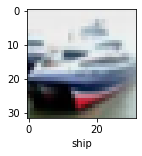

In [34]:
y_test=y_test.reshape(-1,)
plot_sample(x_test,y_test,1)


In [43]:
y_pred=cnn.predict(x_test)

y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [44]:
classes[y_classes[1]]

'ship'